In [68]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances_argmin
import matplotlib
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score



import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
# data cleaning
df = pd.read_csv('./food_coded.csv', na_values="nan")

drop_cols = ['comfort_food', 'comfort_food_reasons',
'diet_current', 'eating_changes', 'father_profession',
'fav_cuisine', 'food_childhood','healthy_meal', 'ideal_diet',
'meals_dinner_friend','mother_profession','type_sports','weight']

df.drop(drop_cols, inplace=True, axis=1)
print(df.head())
print(df.get_dtype_counts())

print(df.isnull().sum().sum())

## fill na values
for column in df:
    median = df[column].median()
    df[column].fillna(median, inplace=True)
## end data cleaning
print(df.isnull().sum().sum())

     GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0  2.400       2          1               430           NaN           315.0   
1  3.654       1          1               610           3.0           420.0   
2  3.300       1          1               720           4.0           420.0   
3  3.200       1          1               430           3.0           420.0   
4  3.500       1          1               720           2.0           420.0   

   coffee  comfort_food_reasons_coded  cook  comfort_food_reasons_coded.1  \
0       1                         9.0   2.0                             9   
1       2                         1.0   3.0                             1   
2       2                         1.0   1.0                             1   
3       2                         2.0   2.0                             2   
4       2                         1.0   1.0                             1   

   ...  persian_food  self_perception_weight  soup  sports  th

In [70]:
to_drop2 =['Id','GPA','calories_chicken', 'calories_scone', 
           'comfort_food_reasons_coded.1','self_perception_weight', 
          'tortilla_calories','turkey_calories','waffle_calories',
          'ethnic_food', 'exercise', 'father_education',
          'eating_changes_coded', 'eating_changes_coded1','employment', 
          'nutritional_check', 'fav_cuisine_coded','life_rewarding','grade_level',
           'calories_day', 'pay_meal_out', 'tortilla_calories','turkey_calories',
           ##extra
           'Gender','comfort_food_reasons_coded', 'cuisine','mother_education', 'persian_food',
           'thai_food', 'indian_food', 'italian_food', 'vitamins', 'greek_food', 
           'fruit_day', 'fries', 'cook', 'healthy_feeling', 'on_off_campus', 'marital_status', 'veggies_day',
           'sports', 'income', 'diet_current_coded', 'soup', 'parents_cook', 'coffee', 'breakfast', 'drink','eating_out'
          ]





df = pd.read_csv('./food_cleaned1.csv')
df.drop(to_drop2, inplace=True, axis=1)




In [71]:
print(df.head())

   fav_food  ideal_diet_coded
0         1                 8
1         1                 3
2         3                 6
3         1                 2
4         3                 2


In [72]:
print(df['fav_food'])

0       1
1       1
2       3
3       1
4       3
5       3
6       1
7       1
8       3
9       1
10      1
11      1
12      3
13      1
14      3
15      2
16      1
17      3
18      3
19      1
20      3
21      2
22      1
23      1
24      1
25      3
26      1
27      1
28      1
29      1
       ..
9969    6
9970    7
9971    2
9972    8
9973    3
9974    3
9975    6
9976    1
9977    9
9978    8
9979    8
9980    1
9981    4
9982    4
9983    8
9984    7
9985    4
9986    9
9987    4
9988    3
9989    9
9990    5
9991    3
9992    6
9993    1
9994    7
9995    8
9996    3
9997    5
9998    6
Name: fav_food, Length: 9999, dtype: int64


In [73]:


x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

# Run local implementation of kmeans
km = KMeans(n_clusters=3, max_iter=100)
km.fit(df)

labels =  km.labels_


Text(0.5,1,'Visualization of clustered data')

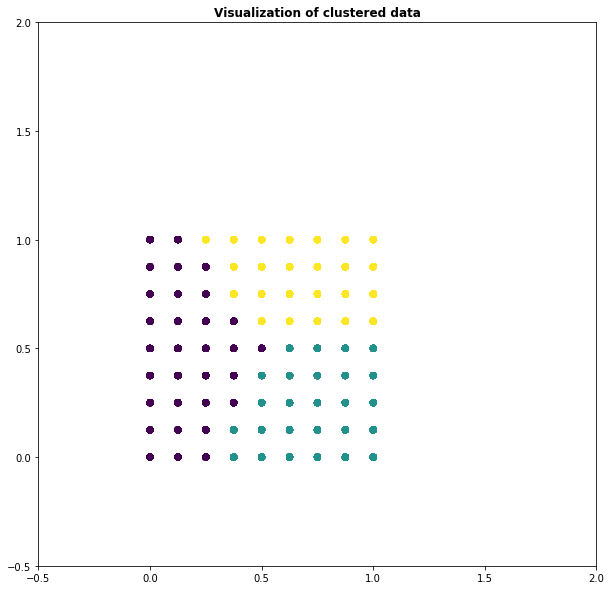

In [74]:

fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(df[0],df[1],
            c=km.labels_)
# plt.scatter(df[1],df[0],
#            c=km.labels_)
# plt.scatter(df['persian_food'],df['persian_food'],
#             c=km.labels_ )
# plt.scatter(df['thai_food'],df['thai_food'],
#           c=km.labels_ )
# plt.scatter(df['coffee'],df['coffee'],
#             c=km.labels_ )



# plt.legend()
plt.xlim([-.5, 2])
plt.ylim([-.5, 2])
plt.title('Visualization of clustered data', fontweight='bold')



[3916, 3140, 2943]


<BarContainer object of 3 artists>

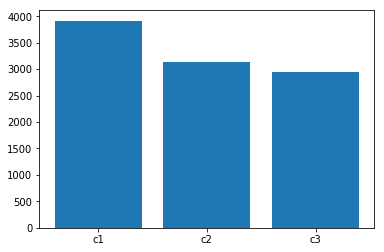

In [75]:
from collections import Counter
c=Counter(labels)
print(c.values())
plt.bar(['c1', 'c2','c3'],c.values())

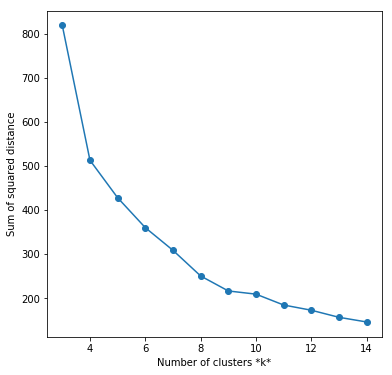

In [76]:
sse = []
list_k = list(range(3, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

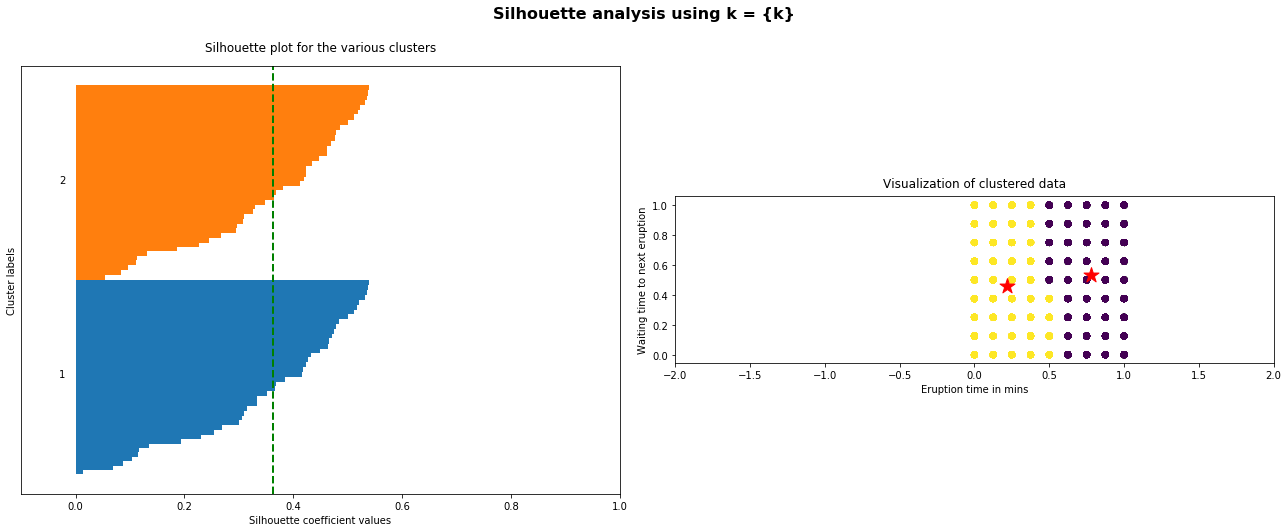

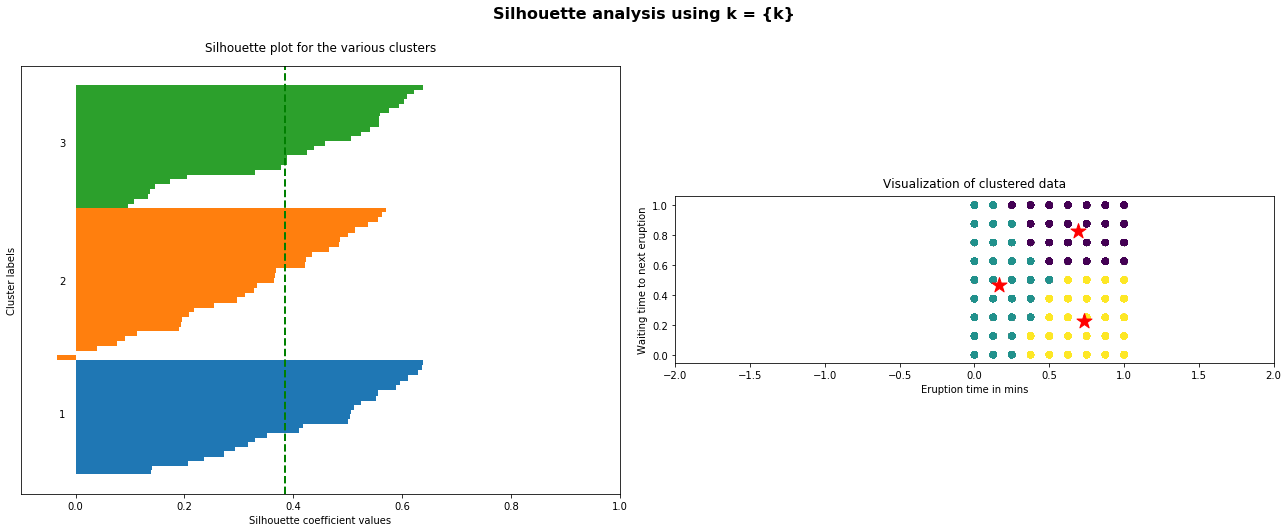

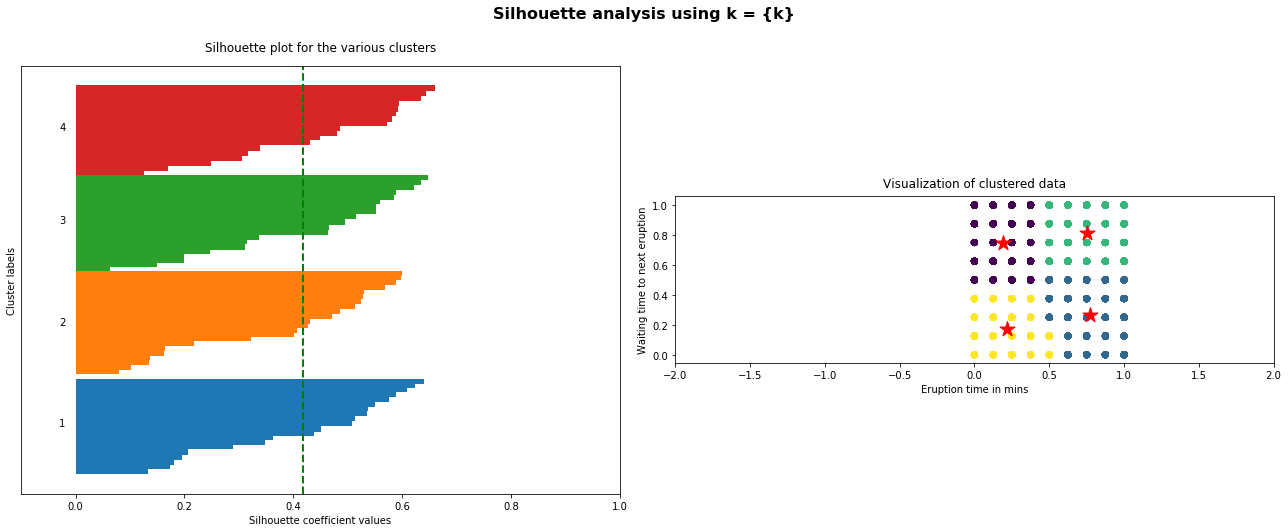

In [78]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(df)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(df, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(df[0], df[1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle('Silhouette analysis using k = {k}',fontsize=16, fontweight='semibold', y=1.05);